# 画像の収集

## Pillowの使い方
### 画像の読み込み

こちらの画像をPillowを使って読み込んでみましょう。
![](img/sample.JPG)

In [3]:
from PIL import Image

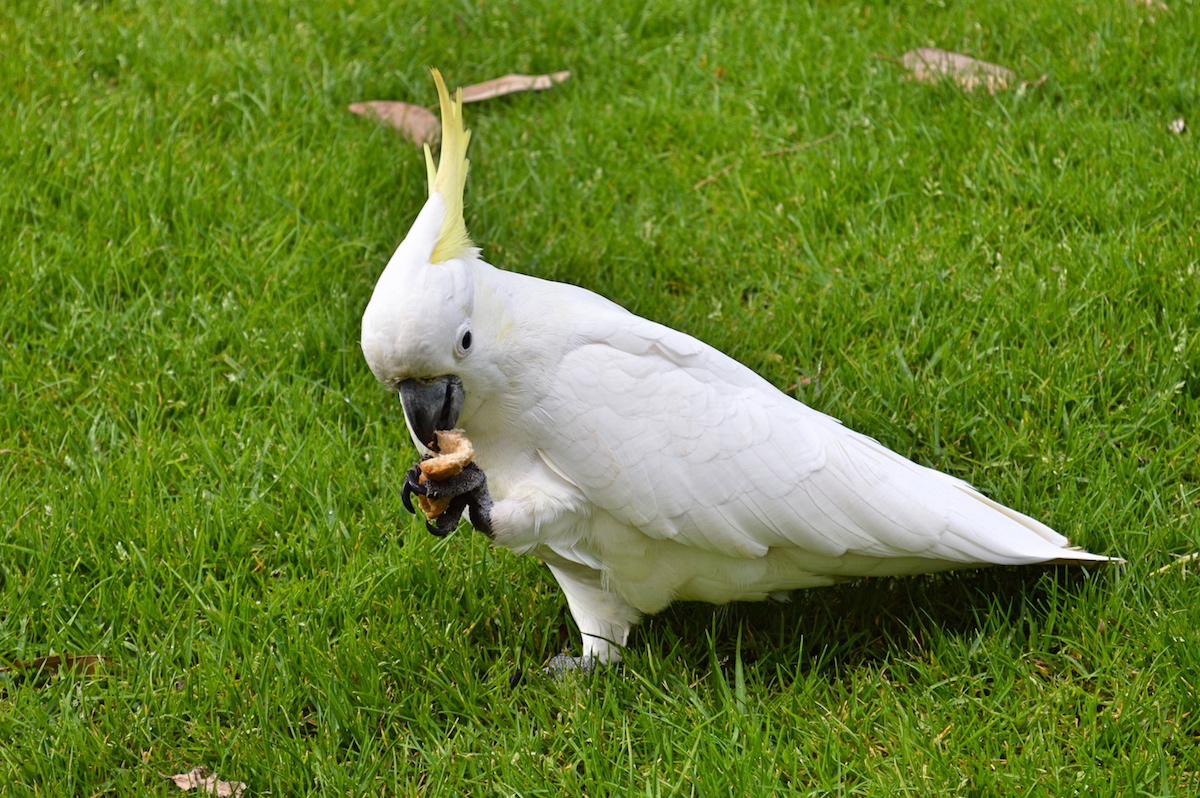

In [6]:
img = Image.open('sample.JPG')
img

In [7]:
img.size

(1200, 798)

### リサイズ

In [8]:
img = img.resize((1024, 768))

In [9]:
img.size

(1024, 768)

### 保存

In [10]:
img.save('sample_resize.jpg')

## 1枚の画像を取得
以下のサイトにアクセスし、1枚目の画像を取得してみましょう。  
https://scraping-for-beginner.herokuapp.com/image

In [11]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://scraping-for-beginner.herokuapp.com/image')

### 要素の取得

In [13]:
elem = browser.find_element_by_class_name('material-placeholder')
elem = elem.find_element_by_tag_name('img')

### 画像URLの取得

In [24]:
url = elem.get_attribute('src')
url

'https://scraping-for-beginner.herokuapp.com/static/assets/img/img1.JPG'

### 画像の取得

In [28]:
import io
from urllib import request

In [29]:
f = io.BytesIO(request.urlopen(url).read())

In [30]:
f

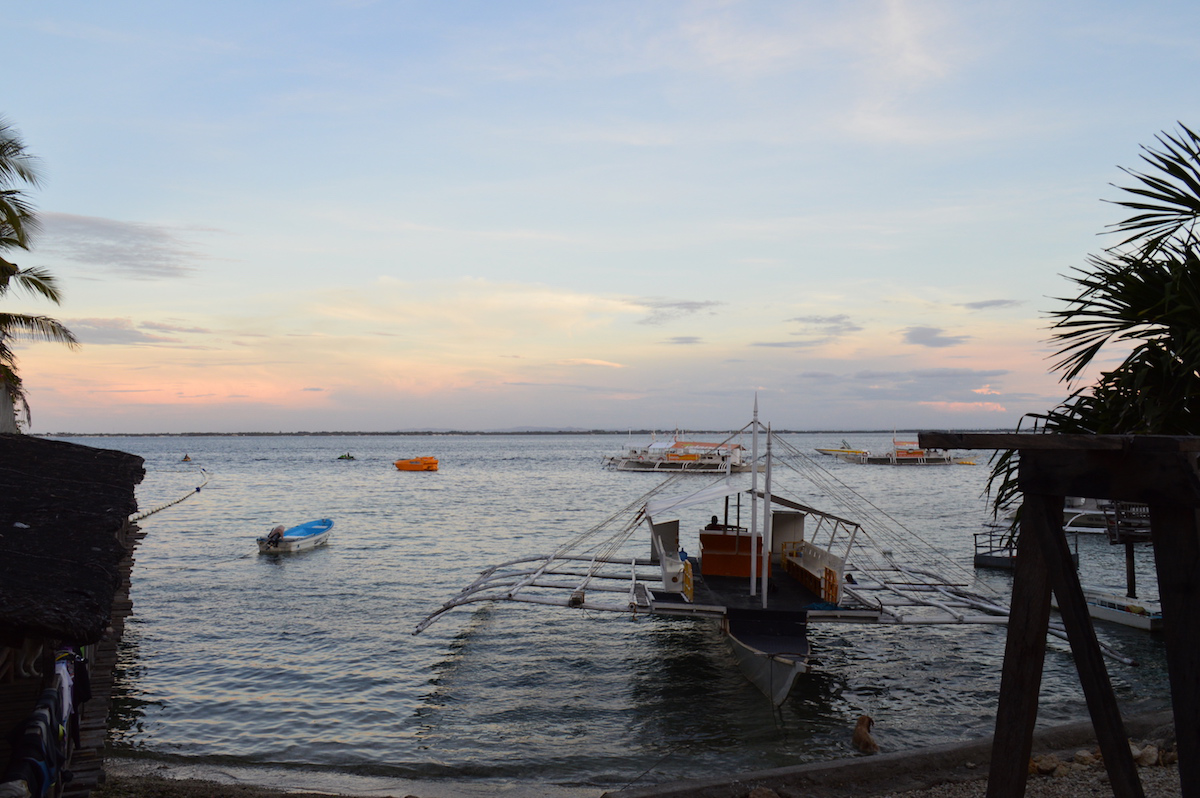

In [31]:
img = Image.open(f)
img

### 画像の保存

In [32]:
img.save('img01.jpg')

## すべての画像を収集
### 1枚の画像取得の流れ

In [33]:
elem = browser.find_element_by_class_name('material-placeholder')
elem = elem.find_element_by_tag_name('img')

url = elem.get_attribute('src')

f = io.BytesIO(request.urlopen(url).read())
img = Image.open(f)
img.save('img01.jpg')

In [34]:
#elementsにする
elems = browser.find_elements_by_class_name('material-placeholder')

# インデックス（要素番号）も取得
for index, elem in enumerate(elems):
    elem = elem.find_element_by_tag_name('img')
    url = elem.get_attribute('src')

    f = io.BytesIO(request.urlopen(url).read())
    img = Image.open(f)
    img.save('image/img{}.jpg'.format(index))